### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
# The notebook and data is persisted in my google drive,
# the notebook has a default location by Colab: Colab Notebooks,
# the data is stored in sub directory created by me, it is called: ColabData
# the following code map and mount my google drive to colab subdirectory: data
#from google.colab import drive
#drive.mount('/content/data', force_remount=True)

Mounted at /content/data


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
#data = pd.read_csv('data/My Drive/ColabData/coupons.csv')
data = pd.read_csv('data/coupos.csv')

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [ ]:
# Get a sense of the column data types and row count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [ ]:
# Discover which columns are missing data
data.isna().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


In [ ]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Percentage of "car" column missing data
((12684 - 12576)/12684)*100

0.8514664143803218

In [ ]:
# Percentage of "CoffeeHouse" column missing data
((12684 - 217)/12684)*100

98.28918322295806

3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
# Since there is only 0.85 percent of "car" column has value, missing 99.15% data. Also 'car' value does not seems to be important to the prediction
# so we will just drop the column
data.drop('car',axis=1, inplace=True)

In [ ]:
# For other missing columns, 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', since only less than 2% are missing
# We'll replace the missing data with the mode of the column

columns_to_imput = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

for column in columns_to_imput:
    mode_value = data[column].mode()[0] # Get the mode value for the current column
    data.loc[data[column].isnull(), column] = mode_value # Fill missing values with the mode


In [ ]:
# Verify that all missing values have been addressed
missing_values = data.isnull().sum()
missing_values

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


4. What proportion of the total observations chose to accept the coupon?



In [ ]:
# Count rows where the coupon was accepted
accepted_coupon = len(data[data['Y'] == 1])
accepted_coupon

7210

In [ ]:
total_coupon = len(data)
total_coupon

12684

In [ ]:
percentage_accepted_coupon = (accepted_coupon/total_coupon)*100
percentage_accepted_coupon

56.84326710816777

In [ ]:
print(f"Total Coupons Accepted: {accepted_coupon}")
print(f"Total Coupons: {total_coupon}")
print(f'Percentage of Coupons Accepted: {percentage_accepted_coupon:.2f}%')

Total Coupons Accepted: 7210
Total Coupons: 12684
Percentage of Coupons Accepted: 56.84%


5. Use a bar plot to visualize the `coupon` column.

In [ ]:
# Predefined order and labels for better presentation in bar plot
coupon_type_order = ['Bar', 'Carry out & Take away', 'Coffee House', 'Restaurant(<20)', 'Restaurant(20-50)']
coupon_type_x_axis_labels = ['Bar', 'Carryout & Takeaway', 'Coffeehouse', 'Restaurants (<$20)', 'Restaurants (\$20 - \$50)']


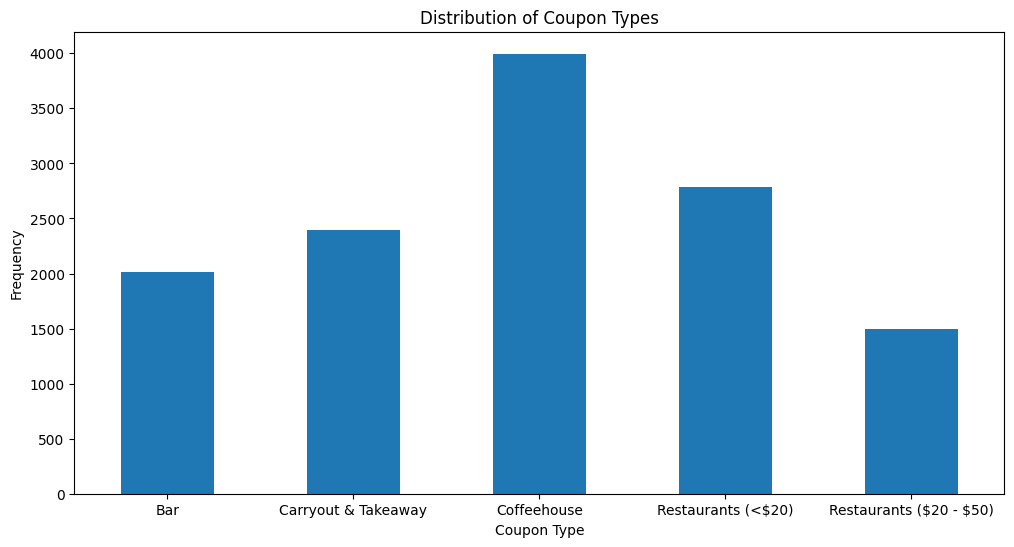

In [ ]:
# Plot
plt.figure(figsize=(12, 6))
data['coupon'].value_counts().loc[coupon_type_order].plot(kind='bar')
plt.xlabel('Coupon Type')
plt.ylabel('Frequency')
plt.title('Distribution of Coupon Types')
plt.xticks(ticks=range(len(coupon_type_order)), labels=coupon_type_x_axis_labels, rotation=0)
plt.show()

6. Use a histogram to visualize the temperature column.

In [ ]:
# Predefined order for better presentation in histogram
temperature_order = [30, 55, 80]

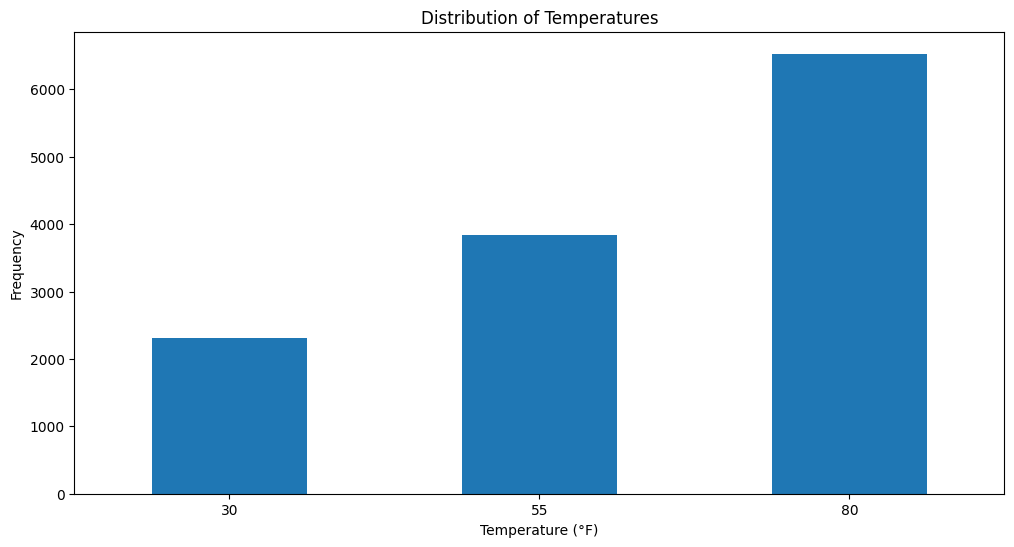

In [ ]:
# Plot
plt.figure(figsize=(12, 6))
data['temperature'].value_counts().loc[temperature_order].plot(kind='bar')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Distribution of Temperatures')
plt.xticks(ticks=range(len(temperature_order)), labels=temperature_order, rotation=0)
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
df_bar = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [ ]:
accepted_bar = len(df_bar[df_bar['Y'] == 1])
accepted_bar

827

In [ ]:
total_bar = len(df_bar)
total_bar

2017

In [ ]:
percentage_accepted_bar = (accepted_bar/total_bar)*100
percentage_accepted_bar

41.00148735746158

In [ ]:
# Print results
print(f"Total Bar Coupons Accepted: {accepted_bar}")
print(f"Total Bar Coupons: {total_bar}")
print(f"Percentage of Bar Coupons Accepted: {percentage_accepted_bar:.2f}%")

Total Bar Coupons Accepted: 827
Total Bar Coupons: 2017
Percentage of Bar Coupons Accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [ ]:
# Define functions to simplify coding
def calculate_coupon_acceptance_rate(data, coupon_type):
    """
    Calculates and prints the acceptance rate for a specific coupon type.

    Args:
        data (pd.DataFrame): The DataFrame containing coupon data.
        coupon_type (str): The type of coupon to analyze (e.g., 'Bar').
    """
    accepted_coupons = len(data[data['Y'] == 1])
    total_coupons = len(data)

    if total_coupons > 0:  # Avoid division by zero
        percentage_accepted = (accepted_coupons / total_coupons) * 100
    else:
        percentage_accepted = 0.0

    return percentage_accepted

def print_coupon_acceptance_rate(data, coupon_type):
    """
    Calculates and prints the acceptance rate for a specific coupon type.

    Args:
        data (pd.DataFrame): The DataFrame containing coupon data.
        coupon_type (str): The type of coupon to analyze (e.g., 'Bar').
    """
    accepted_coupons = len(data[data['Y'] == 1])
    total_coupons = len(data)

    if total_coupons > 0:  # Avoid division by zero
        percentage_accepted = (accepted_coupons / total_coupons) * 100
    else:
        percentage_accepted = 0.0

    print(f"Total {coupon_type} Coupons Accepted: {accepted_coupons}")
    print(f"Total {coupon_type} Coupons: {total_coupons}")
    print(f"Percentage of {coupon_type} Coupons Accepted: {percentage_accepted:.2f}%")

# Example usage:
calculate_coupon_acceptance_rate(df_bar, 'Bar')
print()
print_coupon_acceptance_rate(df_bar, 'Bar')


Total Bar Coupons Accepted: 827
Total Bar Coupons: 2017
Percentage of Bar Coupons Accepted: 41.00%


In [ ]:
less_3_bar = df_bar[df_bar['Bar'].isin(['never', 'less1','1~3'])]
greater_than_3_bar = df_bar[df_bar['Bar'].isin(['4~8','gt8'])]

In [ ]:
print_coupon_acceptance_rate(less_3_bar, 'Bar')
print()
print_coupon_acceptance_rate(greater_than_3_bar, 'Bar')

Total Bar Coupons Accepted: 674
Total Bar Coupons: 1818
Percentage of Bar Coupons Accepted: 37.07%

Total Bar Coupons Accepted: 153
Total Bar Coupons: 199
Percentage of Bar Coupons Accepted: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [ ]:
age_over_25 = ['26', '31', '36', '41', '46', '50plus']
greater_than_25_bar = df_bar[(df_bar['Bar'].isin(['1~3', '4~8', 'gt8'])) & (df_bar['age'].isin(age_over_25))]

# Group 4 Bar: All others
all_other_bar = df_bar[~df_bar.index.isin(greater_than_25_bar.index)]


In [ ]:
print_coupon_acceptance_rate(greater_than_25_bar, 'Bar')
print()
print_coupon_acceptance_rate(all_other_bar, 'Bar')

Total Bar Coupons Accepted: 292
Total Bar Coupons: 420
Percentage of Bar Coupons Accepted: 69.52%

Total Bar Coupons Accepted: 535
Total Bar Coupons: 1597
Percentage of Bar Coupons Accepted: 33.50%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
# Group 5 Bar: Those who go to a bar >=1x per month, had non-kid passengers, and had occupations other than farming, fishing, or forestry
nokid_bar = df_bar[(df_bar['Bar'].isin(['1~3', '4~8', 'gt8'])) &
                (df_bar['passanger'] != 'Kid(s)') &
                (df_bar['occupation'] != 'Farming Fishing & Forestry')]

# Group 6 Bar: All others
nokid_all_other_bar = df_bar[~df_bar.index.isin(nokid_bar.index)]

In [ ]:
print_coupon_acceptance_rate(nokid_bar, 'Bar')
print()
print_coupon_acceptance_rate(nokid_all_other_bar, 'Bar')

Total Bar Coupons Accepted: 393
Total Bar Coupons: 551
Percentage of Bar Coupons Accepted: 71.32%

Total Bar Coupons Accepted: 434
Total Bar Coupons: 1466
Percentage of Bar Coupons Accepted: 29.60%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [ ]:
group_6_1_bar = df_bar[(df_bar['Bar'].isin(['1~3', '4~8', 'gt8'])) &
                (df_bar['passanger'] != 'Kid(s)') &
                (df_bar['maritalStatus'] != 'Widowed')]

age_under_30 = ['below21', '21', '26']
group_6_2_bar = df_bar[(df_bar['Bar'].isin(['1~3', '4~8', 'gt8'])) &
                (df_bar['age'].isin(age_under_30))]

income_under_50K = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
group_6_3_bar = data[(data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
                (data['income'].isin(income_under_50K))]


In [ ]:
print_coupon_acceptance_rate(group_6_1_bar, 'Bar')
print()
print_coupon_acceptance_rate(group_6_2_bar, 'Bar')
print()
print_coupon_acceptance_rate(group_6_3_bar, 'RestaurantLessThan20')

Total Bar Coupons Accepted: 393
Total Bar Coupons: 551
Percentage of Bar Coupons Accepted: 71.32%

Total Bar Coupons Accepted: 249
Total Bar Coupons: 345
Percentage of Bar Coupons Accepted: 72.17%

Total RestaurantLessThan20 Coupons Accepted: 1369
Total RestaurantLessThan20 Coupons: 2279
Percentage of RestaurantLessThan20 Coupons Accepted: 60.07%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

1. Individuals under 30 years old who visit bars more than once monthly
exhibit the highest likelihood of accepting bar coupons. This trend may stem from their frequent bar visits and greater openness to exploring new venues.

2. Bar patrons who visit more than once a month, have no children as passengers, and do not work in agriculture, fishing, or forestry show the second highest coupon acceptance rates. This is comparable to similar frequent bar visitors without child passengers and who are not widowed, indicating a social component to coupon usage and bar attendance.

3. Drivers who frequent bars more than once a month tend to accept more bar coupons, likely seeing more benefit in using them.

4. Those who patronize less expensive restaurants and earn a lower income also show a notable rate of coupon acceptance, though it is the lowest among the groups. This indicates that budget-conscious individuals or those with limited spending money are likely to value these coupons.

5. The substantial acceptance rates, which vary from 60% to 72%, among these groups highlight the potential effectiveness of targeted marketing strategies. Focusing on these particular demographics could yield a significant marketing return on investment.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#Explore the Coffeehouse Coupon Group
##Percentage of Coffeehouse Coupons Accepted

In [ ]:
df_coffeehouse = data[data['coupon'] == 'Coffee House']

In [ ]:
print_coupon_acceptance_rate(df_coffeehouse, 'CoffeeHouse')

Total CoffeeHouse Coupons Accepted: 1995
Total CoffeeHouse Coupons: 3996
Percentage of CoffeeHouse Coupons Accepted: 49.92%


## Coffeehouse Coupons accepted by Destination

In [ ]:
df_coffeehouse_Home = df_coffeehouse[df_coffeehouse['destination'] == 'Home']
df_coffeehouse_Work = df_coffeehouse[df_coffeehouse['destination'] == 'Work']
df_coffeehouse_NoUrgent = df_coffeehouse[df_coffeehouse['destination'] == 'No Urgent Place']

In [ ]:
print("Coffeehouse Coupons accepted by Home:")
print_coupon_acceptance_rate(df_coffeehouse_Home, 'CoffeeHouse')
print()
print("Coffeehouse Coupons accepted by Work:")
print_coupon_acceptance_rate(df_coffeehouse_Work, 'CoffeeHouse')
print()
print("Coffeehouse Coupons accepted by No Urgent Place:")
print_coupon_acceptance_rate(df_coffeehouse_NoUrgent, 'CoffeeHouse')

Coffeehouse Coupons accepted by Home:
Total CoffeeHouse Coupons Accepted: 336
Total CoffeeHouse Coupons: 928
Percentage of CoffeeHouse Coupons Accepted: 36.21%

Coffeehouse Coupons accepted by Work:
Total CoffeeHouse Coupons Accepted: 407
Total CoffeeHouse Coupons: 913
Percentage of CoffeeHouse Coupons Accepted: 44.58%

Coffeehouse Coupons accepted by No Urgent Place:
Total CoffeeHouse Coupons Accepted: 1252
Total CoffeeHouse Coupons: 2155
Percentage of CoffeeHouse Coupons Accepted: 58.10%


In [ ]:
percentage_accepted_coffeehouse_by_destination = {
    'Home': calculate_coupon_acceptance_rate(df_coffeehouse_Home, 'CoffeeHouse'),
    'Work': calculate_coupon_acceptance_rate(df_coffeehouse_Work, 'CoffeeHouse'),
    'No Urgent Place': calculate_coupon_acceptance_rate(df_coffeehouse_NoUrgent, 'CoffeeHouse')
}

percentage_accepted_coffeehouse_by_destination

{'Home': 36.206896551724135,
 'Work': 44.57831325301205,
 'No Urgent Place': 58.09744779582366}

## Plot the result

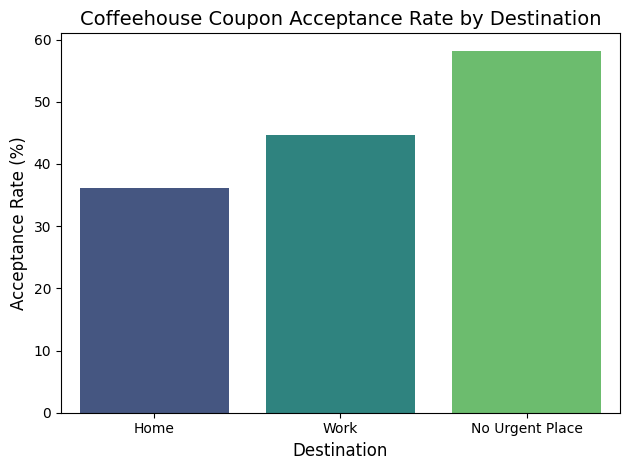

In [ ]:
# Define the order of destinations for the x-axis
destination_order = ['Home', 'Work', 'No Urgent Place']

# Create the bar plot using seaborn
sns.barplot(x=list(percentage_accepted_coffeehouse_by_destination.keys()),
            y=list(percentage_accepted_coffeehouse_by_destination.values()),
            order=destination_order,
            hue=list(percentage_accepted_coffeehouse_by_destination.keys()),  # Assign x to hue
            legend=False,  # Set legend to False
            palette="viridis")

# Customize the plot
plt.xlabel("Destination", fontsize=12)
plt.ylabel("Acceptance Rate (%)", fontsize=12)
plt.title("Coffeehouse Coupon Acceptance Rate by Destination", fontsize=14)
plt.xticks(rotation=0, fontsize=10)  # Rotate x-axis labels if needed
plt.yticks(fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

## Analysis

Based on above plot, it seems that for customer that with "No Urgent Place" to go has the highest coupon acceptance rate, and people has "Home" as the destination with the lowest coupon acceptance rate. This is maybe due to when you are in no hurry, you are more inclined to accept a coupon. And when you are rushing to go home, you are less inclined to accept a coupon.